# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2019</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 3. Hay un notebook por ejercicio planteado.

* [Ejercicio 3 - k-vecinos](#Ejercicio3) (30 puntos)

In [1]:
import numpy as np
from sklearn.datasets import load_iris 

from matplotlib import pyplot as plt

<a id="Ejercicio1"></a>
# Ejercicio 3: k-NN

En este ejercicio se implementará el algoritmo *k-vecinos* más cercanos y se lo aplicará a la base de datos *iris* disponible en *scikit-learn*.      
La implementación del algoritmo se realizará por bloques. Primero se implementará la función que calcula la distancia entre el punto a evaluar y los puntos de entrenamiento, luego la función que encuentra los vecinos más cercanos y finalmente la función que asigna las etiquetas. 

### Parte a) 
Implementar el método `calcular_distancias()` usando distancia Euclídea.

In [14]:
from sklearn.metrics import pairwise_distances

def calcular_distancias(X_train, X_test):
    '''
    Calcula la distancia entre los puntos pertenecientes a X_test 
    y cada uno de los puntos pertenecientes a X_train
    Entrada:
        X_train: matriz de tamaño Nxd que contiene N muestras de entrenamiento
        X_test: matriz de tamaño Mxd que contiene M muestras de test
    Salida:
        matriz_distancias: matriz de tamaño MxN que almacena la distancia 
        entre los puntos de entrenamiento y test
    '''
    
    ############################################################
    ######     EMPIEZA ESPACIO PARA COMPLETAR CODIGO     #######
    ############################################################
    
    
    matriz_distancias = pairwise_distances(X_train, X_test).T
    
    
            
    ############################################################
    ######     TERMINA ESPACIO PARA COMPLETAR CODIGO     #######
    ############################################################
    
    return matriz_distancias


In [16]:
# Test calcular distancias
np.random.seed(33)
X1 = np.random.rand(4,2)
X2 = np.random.rand(3,2)
dists = calcular_distancias(X1,X2)
dists_correctas = np.array([[0.43348961, 0.35191206, 0.35638515, 0.80896094],
                            [0.71874689, 0.56984794, 0.22884153, 1.09870444],
                            [0.19560321, 0.34367931, 0.80814793, 0.60481772]])
assert np.allclose(dists, dists_correctas), 'revise la implementación de calcular_distancias'

### Parte b)
Implementar el método `obtener_indices_k_vecinos()`

In [27]:
def obtener_indices_k_vecinos(distancias, k):
    '''
    Entrada:
        distancias: vector que contiene distancias
        k: número de posiciones a devolver
    Salida:
        indices_vecinos: arreglo de tamaño k que contiene los índices  de 
                         los k-vecinos ordenados del más cercano al más lejano. 
                         Se devuelven sólo los primeros k valores. 
    '''
    ###########################################################
    ######    EMPIEZA ESPACIO PARA COMPLETAR CODIGO     #######
    ###########################################################
    # Sugerencia: puede ser de utilidad la función np.argsort()
    rango = np.arange(k)
    idx = np.argsort(distancias)
    indices_vecinos = idx[rango]
    
    ###########################################################
    ######    TERMINA ESPACIO PARA COMPLETAR CODIGO     #######
    ###########################################################
    return indices_vecinos

In [28]:
ds = np.array([4.1,3.2,5.1,1.3,2.9,8.3])
vecinos = obtener_indices_k_vecinos(ds,3)
assert np.allclose(vecinos,[3,4,1]), 'verifique la implementación de obtener_k_mas_cercanos()'

### Parte c) 
Implementar el método `asignar_etiqueta()`. 

In [37]:
def asignar_etiqueta(etiquetas_vecinos):
    '''
    Devuelve la etiqueta más frecuente entre las etiquetas de los vecinos.
    En caso de empate se devuelve una de las mayoritarias.
        Entrada: vector de largo k que contiene las etiquetas de los k-vecinos
        Salida: etiqueta asignada
    '''
     
    ###########################################################
    ######    EMPIEZA ESPACIO PARA COMPLETAR CODIGO     #######
    ###########################################################
    # Sugerencia: puede ser útil utilizar np.bincount()
    
    ocurrencias = np.bincount(etiquetas_vecinos)
    prediccion = np.argmax(ocurrencias)
    ###########################################################
    ######    TERMINA ESPACIO PARA COMPLETAR CODIGO     #######
    ###########################################################
    
    return prediccion

In [38]:
# Test asignar_etiqueta()
k_etiquetas_ = np.array([2,1,2,3,2,1,2])
pred = asignar_etiqueta(k_etiquetas_)
assert pred==2, 'verifique la implementación de asignar_etiqueta()'

A continuación se integrarán las tres funciones anteriormente implementadas en una función que realiza la predicción utilizando el criterio de *k-vecinos*.

### Parte d)  
Completar la implementación del método `predecir()`

In [62]:
def predecir(X_train, y_train, X_test, k):
    '''
    Entrada:
        X_train: matriz de tamaño Nxd que contiene las características 
                 de las muestras de entrenamiento
        y_train: vector de tamaño N que contiene las etiquetas de las 
                 muestras de entrenamiento
        X_test:  matriz de tamaño Mxd que contiene las características 
                 de las muestras a evaluar
        k:       número de vecinos a considerar
    '''
    # se calcula la distancia entre las muestras de test y las de entrenamiento
    distancias = calcular_distancias(X_train, X_test)
    
    M = len(X_test) 
    y_pred = np.empty(M)
    for i in range(M):
        
        ###########################################################
        ######    EMPIEZA ESPACIO PARA COMPLETAR CODIGO     #######
        ###########################################################
        # ~3 líneas

        indices_vecinos = obtener_indices_k_vecinos(distancias[i], k)
        y_pred[i] = asignar_etiqueta(indices_vecinos)
        
        ###########################################################
        ######    TERMINA ESPACIO PARA COMPLETAR CODIGO     #######
        ###########################################################
        
    return y_pred

## Clasificación con la base iris

La siguiente celda levanta los datos de la *base iris* y los divide en entrenamiento y validación.

In [40]:
data = load_iris()
X = data.data
y = data.target

# Se divide el conjunto de datos en entrenamiento y validación
N=X.shape[0]
np.random.seed(42)
indices  = np.random.permutation(N)
idx = int(0.75*N)
X_train = X[indices[:idx]]
y_train = y[indices[:idx]]
X_val = X[indices[idx:]]
y_val = y[indices[idx:]]

### Parte e)  
Utilizar el método `predecir()` para clasificar las muestras de validación. Establezca un rango de valores de *k* que considere adecuado para este conjunto de datos.

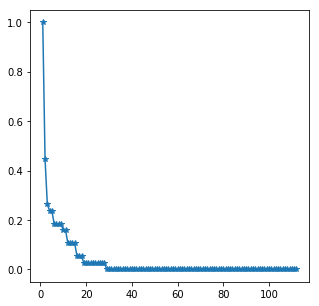

In [108]:
###########################################################
######    EMPIEZA ESPACIO PARA COMPLETAR CODIGO     #######
###########################################################
from sklearn.metrics import accuracy_score

E_val = []


# Como X_train tiene 112 data points, debo usar un k menor o igual a ese numero
ks = np.arange(1,113).reshape(112)
#print(ks.shape)
for i in range(ks.shape[0]):

    y_pred = predecir(X_train, y_train, X_val, ks[i])
    E_val.append(accuracy_score(y_val, y_pred)) 

###########################################################
######    TERMINA ESPACIO PARA COMPLETAR CODIGO     #######
###########################################################
plt.figure(figsize=(5,5))
plt.plot(ks, E_val, '*-')
plt.show()

Se observa que alrededor de 30 el $E_{val}$ ya es cero:

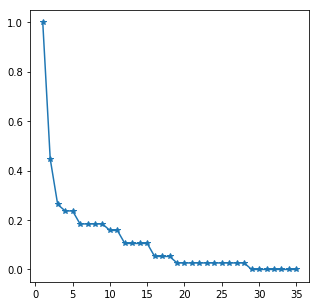

In [116]:
plt.figure(figsize=(5,5))
plt.plot(ks[:35], E_val[:35], '*-')
plt.show()